In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_dir = "data"
data_path = os.path.join(data_dir, 'loan.csv')

In [4]:
loan_df = pd.read_csv(data_path)
loan_df.head()

C:\Users\kaust\AppData\Local\Temp\ipykernel_2556\2222007991.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv(data_path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loan_df = loan_df[loan_df['loan_status'] != "Current"]

In [22]:
# removing columns that have all missing values or just one unique value
useful_columns = loan_df.columns[~(loan_df.isna().all(axis=0) | (loan_df.nunique()==1))]
useful_columns.sort_values()

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term',
       'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status',
       'zip_code'],
      dtype='object')

In [59]:
columns_to_drop = ['url', 'member_id', 'id', # these are not useful for the loan risk
                   'addr_state', 'zip_code', # it makes less sense to discriminate people on the basis of the state. Fairness concern
                   'collection_recovery_fee', 'recoveries', # occurs once the person has defaulted
                   'desc', 'title', # reason for loan, must have some potential but contains too many unique value. Information already summarized in the 'purpose' column
                   'emp_title', # does not seem to be a useful metric
                   'last_credit_pull_d', # sometimes occures after the last_pymn_amnt, this information would be incorrect in terms of active loans or new applications
                   'last_pymnt_d', # not usable as the current date is not mentioned in use case
                   ]

In [145]:
df_analysis = loan_df[useful_columns.sort_values()]
df_analysis = df_analysis.drop(columns_to_drop, axis = 1)
df_analysis.head()

,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,last_pymnt_amnt,loan_amnt,loan_status,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status
0,24000.0,0,27.65,Jan-85,10+ years,5000,4975.0,B,RENT,1,162.87,10.65%,Dec-11,171.62,5000,Fully Paid,NaN,NaN,3,0,0.0,credit_card,13648,83.70%,B2,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified
1,30000.0,0,1.00,Apr-99,< 1 year,2500,2500.0,C,RENT,5,59.83,15.27%,Dec-11,119.66,2500,Charged Off,NaN,NaN,3,0,0.0,car,1687,9.40%,C4,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified
2,12252.0,0,8.72,Nov-01,10+ years,2400,2400.0,C,RENT,2,84.33,15.96%,Dec-11,649.91,2400,Fully Paid,NaN,NaN,2,0,0.0,small_business,2956,98.50%,C5,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified
3,49200.0,0,20.00,Feb-96,10+ years,10000,10000.0,C,RENT,1,339.31,13.49%,Dec-11,357.48,10000,Fully Paid,35.0,NaN,10,0,0.0,other,5598,21%,C1,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified
5,36000.0,0,11.20,Nov-04,3 years,5000,5000.0,A,RENT,3,156.46,7.90%,Dec-11,161.03,5000,Fully Paid,NaN,NaN,9,0,0.0,wedding,7963,28.30%,A4,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified


### Creating derived metrics

#### Type Driven Metrics

In [146]:
new_variables = set()
add_variables_to_drop = set()

In [94]:
# type derived metrics

## ordinal
experience_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                    '6 years', '7 years', '8 years', '9 years', '10+ years']
df_analysis['emp_length'] = pd.Categorical(df_analysis['emp_length'], categories=experience_order, ordered=True)
df_analysis['emp_length_enc'] = pd.factorize(df_analysis['emp_length'], sort=True)[0]
new_variables.add('emp_length_enc')
add_variables_to_drop.add('emp_length')

df_analysis['grade_enc'] = pd.factorize(df_analysis['grade'], sort=True)[0]
new_variables.add('grade_enc')
add_variables_to_drop.add('grade')

df_analysis['sub_grade_enc'] =  pd.factorize(df_analysis['sub_grade'], sort=True)[0]
new_variables.add('sub_grade_enc')
add_variables_to_drop.add('sub_grade')

## nominal
df_analysis['home_ownership_enc'] = pd.factorize(df_analysis['home_ownership'])[0]
new_variables.add('home_owenership_enc')
add_variables_to_drop.add('home_ownership')

df_analysis['purpose_enc'] = pd.factorize(df_analysis['purpose'])[0]
new_variables.add('purpose_enc')
add_variables_to_drop.add('purpose')

In [147]:
# data cleanup
df_analysis['int_rate'] = df_analysis['int_rate'].str.replace('%','').astype(float)
df_analysis['revol_util'] = df_analysis['revol_util'].str.replace('%','').astype(float)

In [148]:
# type derived metrics

## ordinal
experience_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                    '6 years', '7 years', '8 years', '9 years', '10+ years']
df_analysis['emp_length'] = pd.Categorical(df_analysis['emp_length'], categories=experience_order, ordered=True)

df_analysis['grade'] = pd.Categorical(df_analysis['grade'], categories=df_analysis['grade'].drop_duplicates().sort_values(ascending=False), ordered = True)

df_analysis['sub_grade'] =  pd.Categorical(df_analysis['sub_grade'], categories=df_analysis['sub_grade'].drop_duplicates().sort_values(ascending=False), ordered = True)

## nominal
df_analysis['home_ownership'] = pd.Categorical(df_analysis['home_ownership'])

df_analysis['purpose'] = pd.Categorical(df_analysis['purpose'])


In [149]:

# business derived metrics
df_analysis['months_since_earliest_credit_line'] = (pd.to_datetime(df_analysis['issue_d'], format="%b-%y") -
                                                   pd.to_datetime(df_analysis['earliest_cr_line'],format="%b-%y")).dt.days/30
add_variables_to_drop.add('issue_d')
add_variables_to_drop.add('earliest_cr_line')
new_variables.add('months_since_earliest_credit_line')

df_analysis['per_inst_salary'] = df_analysis['installment']/(df_analysis['annual_inc']/12)


In [150]:
new_variables, add_variables_to_drop

({'months_since_earliest_credit_line'}, {'earliest_cr_line', 'issue_d'})

In [151]:
df_analysis = df_analysis.drop(add_variables_to_drop, axis = 1)
df_analysis.head()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,loan_status,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,months_since_earliest_credit_line,per_inst_salary
0,24000.0,0,27.65,10+ years,5000,4975.0,B,RENT,1,162.87,10.65,171.62,5000,Fully Paid,NaN,NaN,3,0,0.0,credit_card,13648,83.7,B2,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,327.666667,0.081435
1,30000.0,0,1.00,< 1 year,2500,2500.0,C,RENT,5,59.83,15.27,119.66,2500,Charged Off,NaN,NaN,3,0,0.0,car,1687,9.4,C4,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,154.233333,0.023932
2,12252.0,0,8.72,10+ years,2400,2400.0,C,RENT,2,84.33,15.96,649.91,2400,Fully Paid,NaN,NaN,2,0,0.0,small_business,2956,98.5,C5,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,122.733333,0.082595
3,49200.0,0,20.00,10+ years,10000,10000.0,C,RENT,1,339.31,13.49,357.48,10000,Fully Paid,35.0,NaN,10,0,0.0,other,5598,21.0,C1,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,192.733333,0.082759
5,36000.0,0,11.20,3 years,5000,5000.0,A,RENT,3,156.46,7.90,161.03,5000,Fully Paid,NaN,NaN,9,0,0.0,wedding,7963,28.3,A4,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified,86.200000,0.052153


### Skew Analysis of the numberical variables variables

In [152]:
numerical_data = df_analysis.select_dtypes([int, float])
numerical_data.skew()

annual_inc                           31.198414
delinq_2yrs                           5.033279
dti                                  -0.026842
funded_amnt                           1.103828
funded_amnt_inv                       1.129997
inq_last_6mths                        1.384390
installment                           1.150486
int_rate                              0.293627
last_pymnt_amnt                       2.663612
loan_amnt                             1.078103
mths_since_last_delinq                0.303102
mths_since_last_record               -0.698593
open_acc                              1.007288
pub_rec                               4.519991
pub_rec_bankruptcies                  4.523507
revol_bal                             3.212019
revol_util                           -0.027569
total_acc                             0.832481
total_pymnt                           1.360484
total_pymnt_inv                       1.377466
total_rec_int                         2.699606
total_rec_lat

In [162]:
categorical_data = df_analysis.select_dtypes('object')

#### Analysis of Corrected Columns

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
# sns.pairplot(data=df_analysis_t[corrected_columns].sample(frac = 0.1), kind='reg')

In [160]:
numerical_data_bin = pd.concat([pd.qcut(numerical_data[j], q=5, duplicates = 'drop') for j in numerical_data.columns], axis = 1)

,annual_inc,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,months_since_earliest_credit_line,per_inst_salary
0,"(3999.999, 37196.16]","(-0.001, 11.0]","(19.71, 29.99]","(499.999, 5000.0]","(4375.0, 7000.0]","(-0.001, 1.0]","(149.922, 228.71]","(7.9, 10.99]","(-0.001, 177.404]","(499.999, 5000.0]",NaN,NaN,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(11391.6, 19617.0]","(77.3, 99.9]","(1.999, 12.0]","(4689.047, 7720.566]","(4176.844, 7174.698]","(531.612, 1000.5]","(-0.001, 180.2]","(3766.0, 6250.0]","(223.233, 520.5]","(0.0681, 0.0969]"
1,"(3999.999, 37196.16]","(-0.001, 11.0]","(-0.001, 6.91]","(499.999, 5000.0]","(-0.001, 4375.0]","(2.0, 8.0]","(15.689, 149.922]","(15.21, 24.4]","(-0.001, 177.404]","(499.999, 5000.0]",NaN,NaN,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(-0.001, 2787.0]","(-0.001, 19.9]","(1.999, 12.0]","(-0.001, 4689.047]","(-0.001, 4176.844]","(-0.001, 531.612]","(-0.001, 180.2]","(-0.001, 3766.0]","(135.933, 170.433]","(-0.000711, 0.0307]"
2,"(3999.999, 37196.16]","(-0.001, 11.0]","(6.91, 11.35]","(499.999, 5000.0]","(-0.001, 4375.0]","(1.0, 2.0]","(15.689, 149.922]","(15.21, 24.4]","(373.44, 1115.036]","(499.999, 5000.0]",NaN,NaN,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(2787.0, 6528.0]","(77.3, 99.9]","(1.999, 12.0]","(-0.001, 4689.047]","(-0.001, 4176.844]","(531.612, 1000.5]","(-0.001, 180.2]","(-0.001, 3766.0]","(98.4, 135.933]","(0.0681, 0.0969]"
3,"(37196.16, 50004.0]","(-0.001, 11.0]","(19.71, 29.99]","(7500.0, 10875.0]","(7000.0, 10000.0]","(-0.001, 1.0]","(327.96, 480.33]","(12.84, 15.21]","(177.404, 373.44]","(7750.0, 11200.0]","(27.0, 40.0]",NaN,"(8.0, 10.0]","(-0.001, 4.0]","(-0.001, 2.0]","(2787.0, 6528.0]","(19.9, 39.9]","(31.0, 90.0]","(11747.028, 17925.693]","(11157.036, 17246.036]","(1707.564, 3182.512]","(-0.001, 180.2]","(6250.0, 10000.0]","(170.433, 223.233]","(0.0681, 0.0969]"
5,"(3999.999, 37196.16]","(-0.001, 11.0]","(6.91, 11.35]","(499.999, 5000.0]","(4375.0, 7000.0]","(2.0, 8.0]","(149.922, 228.71]","(5.419, 7.9]","(-0.001, 177.404]","(499.999, 5000.0]",NaN,NaN,"(8.0, 10.0]","(-0.001, 4.0]","(-0.001, 2.0]","(6528.0, 11391.6]","(19.9, 39.9]","(1.999, 12.0]","(4689.047, 7720.566]","(4176.844, 7174.698]","(531.612, 1000.5]","(-0.001, 180.2]","(3766.0, 6250.0]","(-730.501, 98.4]","(0.0484, 0.0681]"


In [161]:
for col in numerical_data_bin.columns:
    numerical_data_bin[col] = numerical_data_bin[col].cat.add_categories(-1)

numerical_data_bin = numerical_data_bin.fillna(-1)

,annual_inc,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,months_since_earliest_credit_line,per_inst_salary
0,"(3999.999, 37196.16]","(-0.001, 11.0]","(19.71, 29.99]","(499.999, 5000.0]","(4375.0, 7000.0]","(-0.001, 1.0]","(149.922, 228.71]","(7.9, 10.99]","(-0.001, 177.404]","(499.999, 5000.0]",-1,-1,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(11391.6, 19617.0]","(77.3, 99.9]","(1.999, 12.0]","(4689.047, 7720.566]","(4176.844, 7174.698]","(531.612, 1000.5]","(-0.001, 180.2]","(3766.0, 6250.0]","(223.233, 520.5]","(0.0681, 0.0969]"
1,"(3999.999, 37196.16]","(-0.001, 11.0]","(-0.001, 6.91]","(499.999, 5000.0]","(-0.001, 4375.0]","(2.0, 8.0]","(15.689, 149.922]","(15.21, 24.4]","(-0.001, 177.404]","(499.999, 5000.0]",-1,-1,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(-0.001, 2787.0]","(-0.001, 19.9]","(1.999, 12.0]","(-0.001, 4689.047]","(-0.001, 4176.844]","(-0.001, 531.612]","(-0.001, 180.2]","(-0.001, 3766.0]","(135.933, 170.433]","(-0.000711, 0.0307]"
2,"(3999.999, 37196.16]","(-0.001, 11.0]","(6.91, 11.35]","(499.999, 5000.0]","(-0.001, 4375.0]","(1.0, 2.0]","(15.689, 149.922]","(15.21, 24.4]","(373.44, 1115.036]","(499.999, 5000.0]",-1,-1,"(1.999, 6.0]","(-0.001, 4.0]","(-0.001, 2.0]","(2787.0, 6528.0]","(77.3, 99.9]","(1.999, 12.0]","(-0.001, 4689.047]","(-0.001, 4176.844]","(531.612, 1000.5]","(-0.001, 180.2]","(-0.001, 3766.0]","(98.4, 135.933]","(0.0681, 0.0969]"
3,"(37196.16, 50004.0]","(-0.001, 11.0]","(19.71, 29.99]","(7500.0, 10875.0]","(7000.0, 10000.0]","(-0.001, 1.0]","(327.96, 480.33]","(12.84, 15.21]","(177.404, 373.44]","(7750.0, 11200.0]","(27.0, 40.0]",-1,"(8.0, 10.0]","(-0.001, 4.0]","(-0.001, 2.0]","(2787.0, 6528.0]","(19.9, 39.9]","(31.0, 90.0]","(11747.028, 17925.693]","(11157.036, 17246.036]","(1707.564, 3182.512]","(-0.001, 180.2]","(6250.0, 10000.0]","(170.433, 223.233]","(0.0681, 0.0969]"
5,"(3999.999, 37196.16]","(-0.001, 11.0]","(6.91, 11.35]","(499.999, 5000.0]","(4375.0, 7000.0]","(2.0, 8.0]","(149.922, 228.71]","(5.419, 7.9]","(-0.001, 177.404]","(499.999, 5000.0]",-1,-1,"(8.0, 10.0]","(-0.001, 4.0]","(-0.001, 2.0]","(6528.0, 11391.6]","(19.9, 39.9]","(1.999, 12.0]","(4689.047, 7720.566]","(4176.844, 7174.698]","(531.612, 1000.5]","(-0.001, 180.2]","(3766.0, 6250.0]","(-730.501, 98.4]","(0.0484, 0.0681]"


In [218]:
def calc_woe(data, feature, target):

    grouped = data.groupby(feature, observed=False)[target].agg(['count', 'sum'])
    grouped['bad'] = grouped['sum']
    grouped['good'] = grouped['count'] - grouped['bad']
    
    # Calculate WoE and IV
    grouped['total_good'] = grouped['good'].sum()
    grouped['total_bad'] = grouped['bad'].sum()
    
    grouped['woe'] = np.log((grouped['good'] / grouped['total_good']) / 
                            (grouped['bad'] / grouped['total_bad']))
    
    return grouped[['woe']]

def plot_woe(grouped_data, feature, ax):
    
    sns.barplot(x=grouped_data.index, y='woe', data=grouped_data, color='b', ax = ax)
    ax.set_title(f'Weight of Evidence for {feature}')
    ax.set_xlabel(f'{feature} Bins')
    ax.set_ylabel('WoE')
    ax.tick_params(axis='x', rotation=45)

In [361]:
def calc_woe(data, feature, target):
    # Group by the specified feature and calculate counts and sums
    grouped = data.groupby(feature, observed=False)[target].agg(['count', 'sum'])
    
    # Calculate good and bad counts
    grouped['bad'] = grouped['sum']
    grouped['good'] = grouped['count'] - grouped['bad']
    
    # Calculate total good and bad
    grouped['total_good'] = grouped['good'].sum()
    grouped['total_bad'] = grouped['bad'].sum()
    
    # Calculate WoE
    grouped['woe'] = np.log((grouped['good'] / grouped['total_good']) / 
                            (grouped['bad'] / grouped['total_bad']))
    
    # Calculate Information Value (IV)
    grouped['iv'] = (grouped['good'] / grouped['total_good'] - 
                     grouped['bad'] / grouped['total_bad']) * grouped['woe']
    
    # Return WoE and IV
    return grouped[['woe', 'iv']]

def plot_woe(grouped_data, feature, ax):
    # Plot WoE
    sns.barplot(x=grouped_data.index, y='woe', data=grouped_data, color='b', ax=ax)
    ax.set_title(f'Weight of Evidence and Information Value for {feature}')
    ax.set_xlabel(f'{feature} Bins')
    ax.set_ylabel('Weight of Evidence (WoE)')
    ax.tick_params(axis='x', rotation=45)

    # Create a secondary y-axis for IV
    ax2 = ax.twinx()
    # print(grouped_data.index)
    total_iv = grouped_data['iv'].sum()
    # Add a horizontal line for total IV
    ax2.axhline(y=total_iv, color='orange', linestyle='--', label='Total IV')
    ax2.set_ylabel('Information Value (IV)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Show the legend
    ax.legend(['WoE'], loc='upper left')
    ax2.legend(['IV'], loc='upper right')

In [362]:
all_categorical_data = pd.concat([numerical_data_bin,categorical_data], axis = 1)

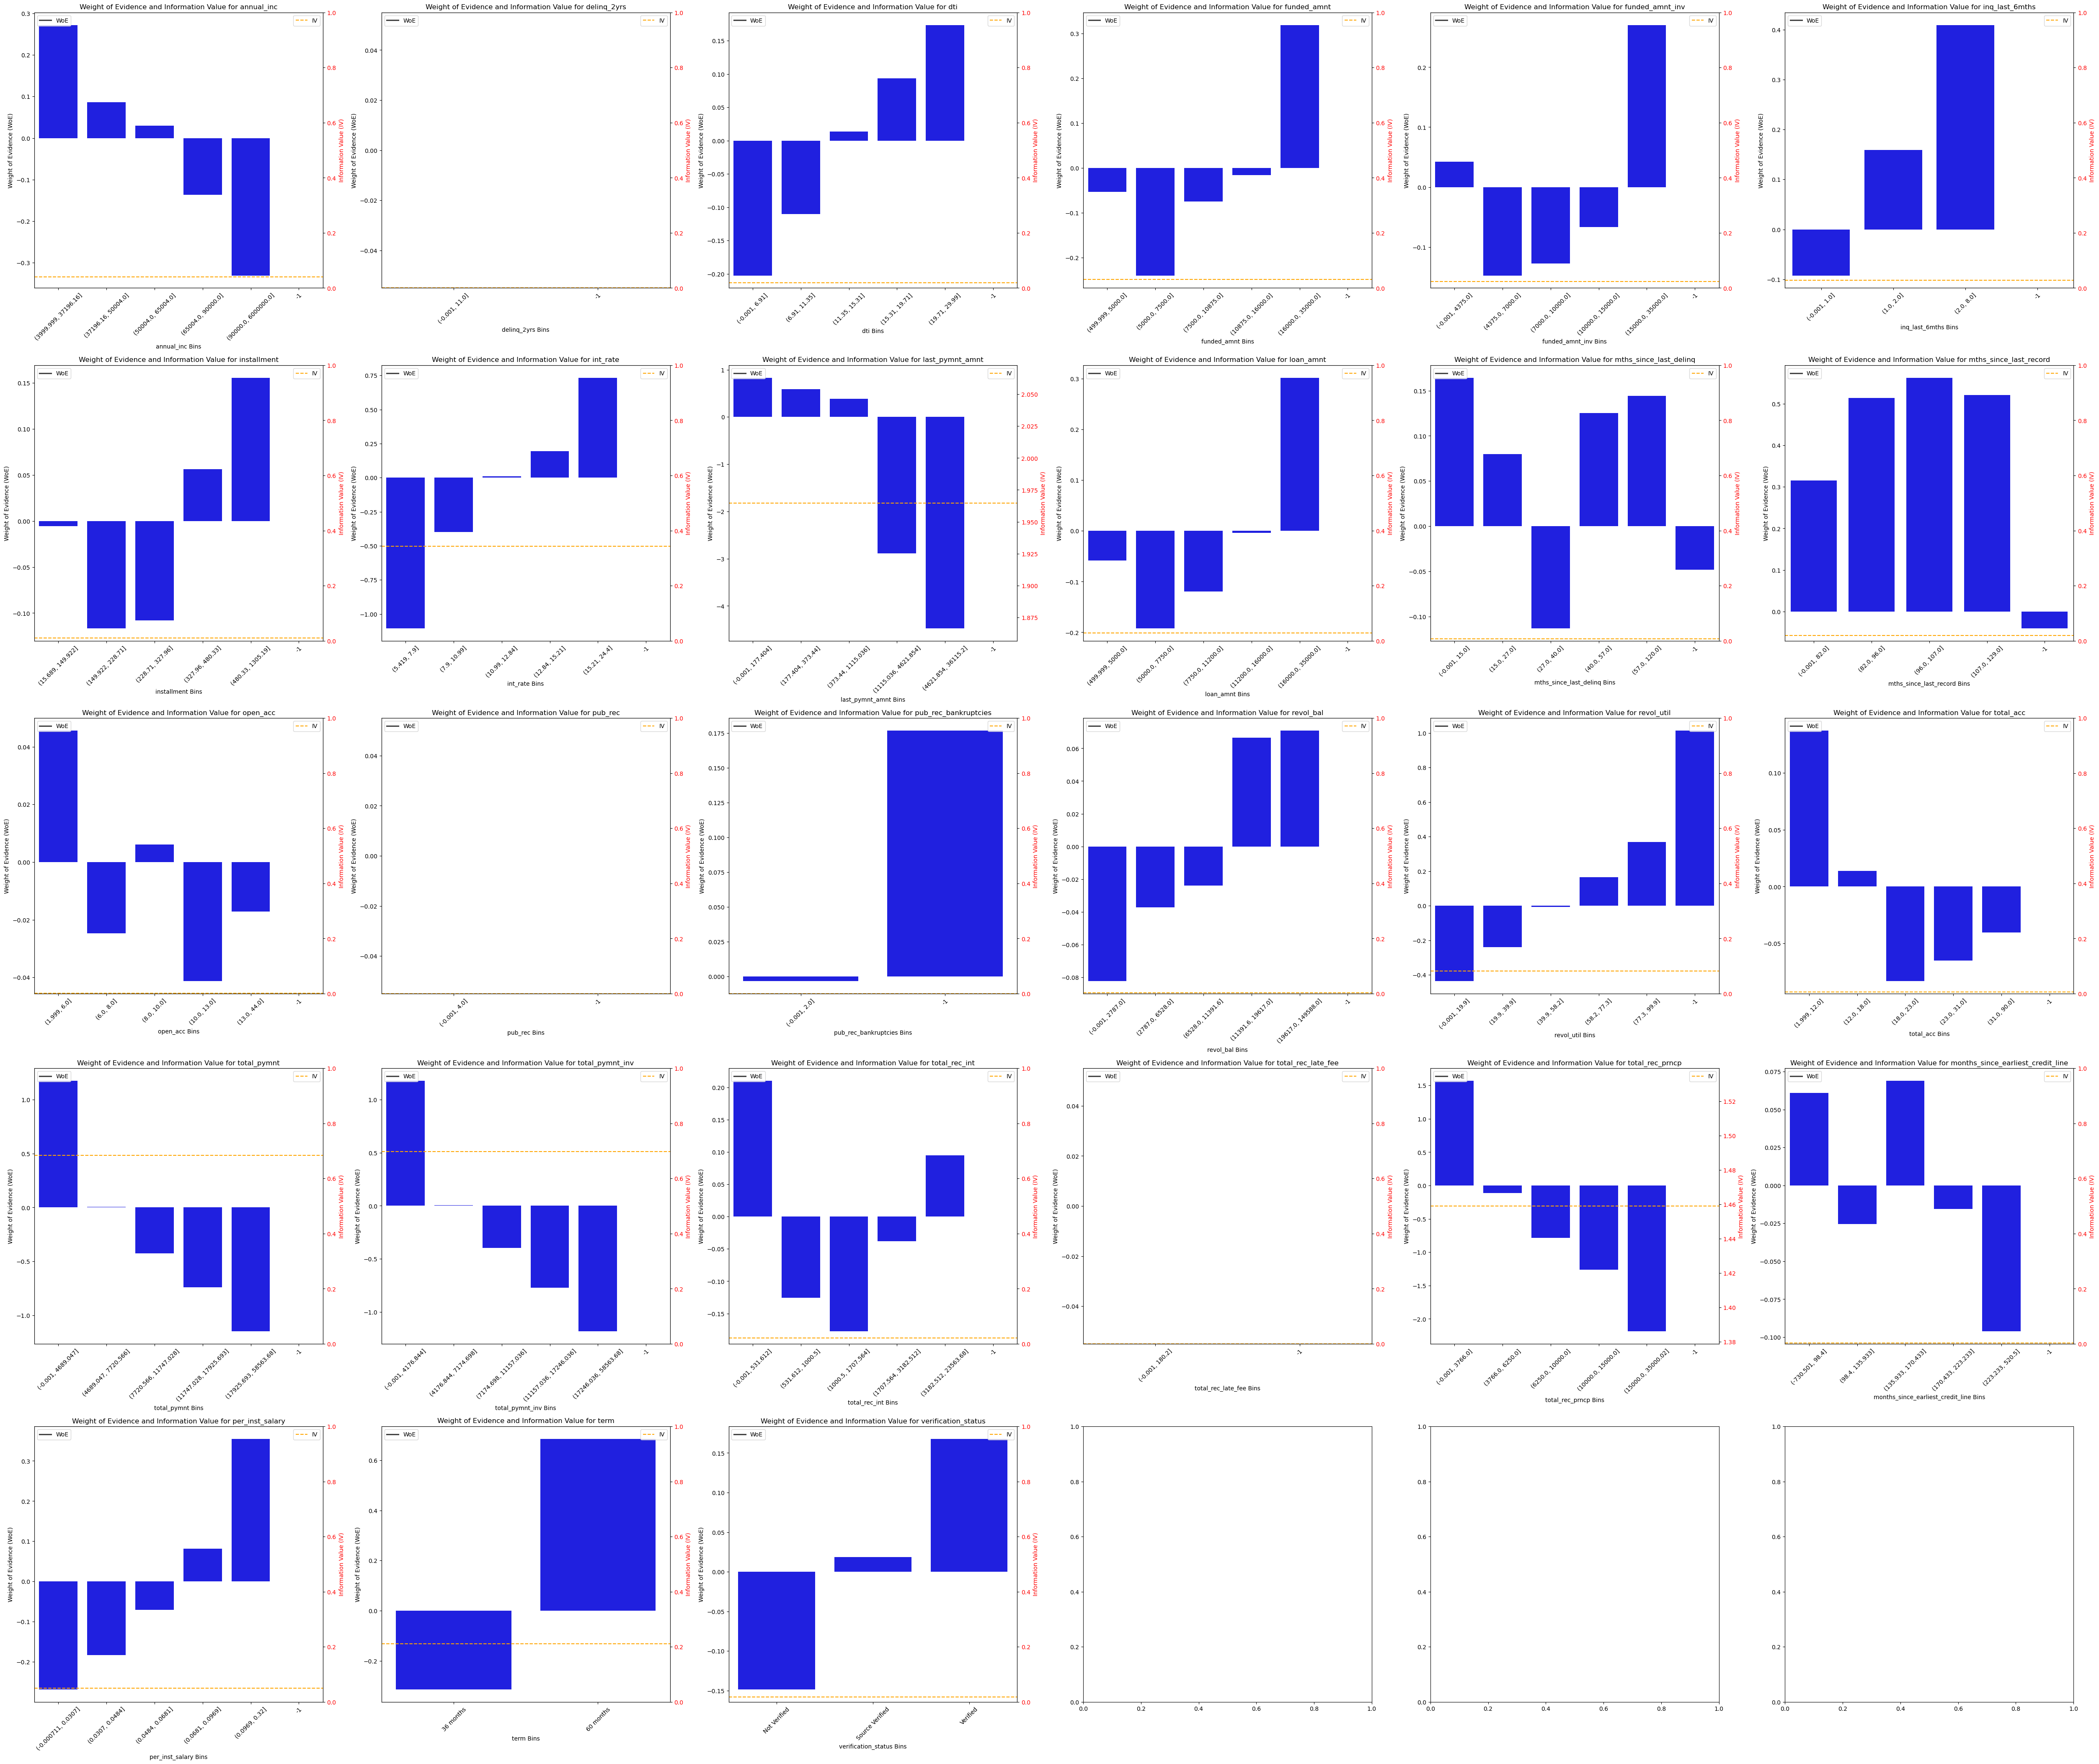

In [363]:
import math
woe_dfs = []
num_idv = len(all_categorical_data.columns) - 1
rows = int(num_idv**0.5)
columns = math.ceil(num_idv/rows)
fig, ax = plt.subplots(rows, columns, figsize = (rows*10, columns*7), constrained_layout=True)
all_categorical_data['loan_status'] = all_categorical_data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
for idx, idv in enumerate(all_categorical_data.drop('loan_status', axis = 1).columns):
    r = idx//columns
    c = idx%columns
    woe_data = calc_woe(all_categorical_data, feature=idv, target='loan_status')
    plot_woe(woe_data, feature=idv, ax = ax[r][c])
    woe_dfs.append(woe_data.unstack())

plt.show()

## In the example above the bins for which the weight of evidence is significantly positive compared to other bins of the same feature, have good predictive power for Defaulters.

In [371]:
# select all conditions for good predictive power

conditions_d = {}

for woe_df in woe_dfs:
    idv = woe_df.index.names[-1]
    woe_df = woe_df.unstack().T
    woe_df_d = woe_df[(woe_df['iv'] > 0.1) & (woe_df['woe'] > 0)]
    conditions_d[idv] = woe_df_d.index


In [386]:
precisions = []
for condition in conditions_d:
    temp = all_categorical_data[all_categorical_data[condition].isin(conditions_d[condition])]
    if temp.shape[0] > 0:
        precision = temp['loan_status'].mean()
        count = temp.shape[0]
        precisions.append(['default' ,condition, conditions_d[condition].to_list(), precision, count])

In [390]:
precisions_df = pd.DataFrame(precisions, columns = ['prediction', 'feature', 'values', 'precision', 'support'])
precisions_df.sort_values('precision', ascending = False)

,prediction,feature,values,precision,support
5,default,term,[ 60 months],0.746862,9481
0,default,int_rate,"[(15.21, 24.4]]",0.737850,7675
1,default,last_pymnt_amnt,"[(-0.001, 177.404]]",0.718766,7716
2,default,total_pymnt,"[(-0.001, 4689.047]]",0.644375,7716
3,default,total_pymnt_inv,"[(-0.001, 4176.844]]",0.643468,7716
4,default,total_rec_prncp,"[(-0.001, 3766.0]]",0.549248,7716
